# <center>UTILIZANDO PYTHON E BANCO DE DADOS IBM

### <center>CRIANDO, INSERINDO E BUSCANDO DADOS COM SQL E BIBLIOTECA PANDAS



<center><img src="https://img.shields.io/badge/Python-3.10.0%2B-orange" alt="drawing" width="80"/>

[<center>![](https://img.shields.io/badge/Linkedin-rgiz-blue)](https://www.linkedin.com/in/rgiz/)
    

<center><img src="https://www.siteware.com.br/wp-content/uploads/2018/12/programa-de-analise-de-dados.jpg" alt="drawing" width="850"/>


__________


### OBJETIVO
O objetivo desse projeto &eacute; criar um banco de dados no modelo de oficina mecânica, inserir e fazer buscas no banco <strong>DB2</strong> da <strong>IBM</strong> em seu servidor online utilizando as ferramentas <strong>PYTHON</strong> e <strong>PANDAS</strong>.


____

### IMPORTANDO BIBLIOTECAS DENTRO DA IDE

In [1]:
import ibm_db
import pandas as pd
import ibm_db_dbi
import warnings
warnings.filterwarnings('ignore')

________


### CRIANDO INSTÂNCIA DE BANCO DE DADOS NA CLOUD IBM


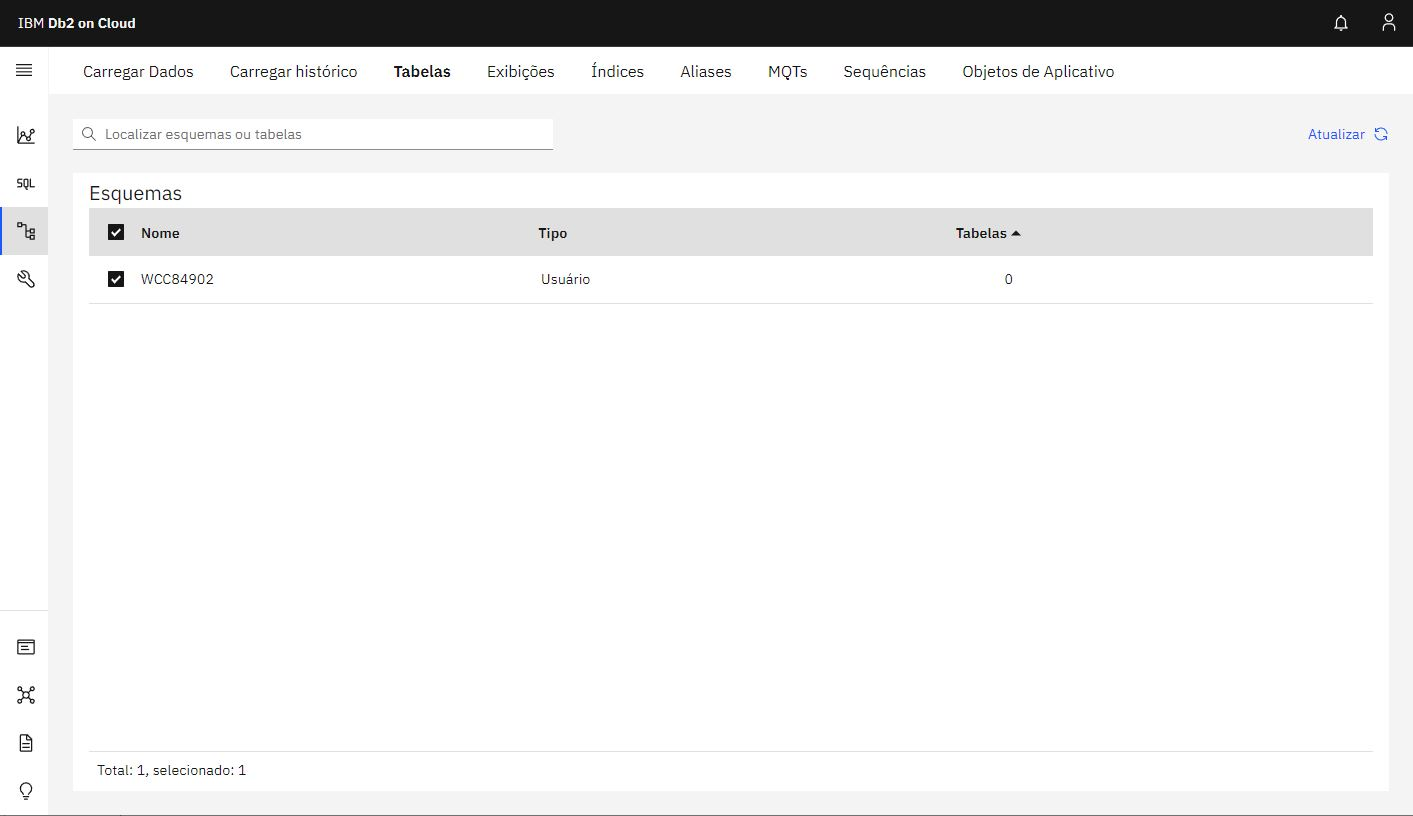

### FAZENDO CONEXÃO ENTRE PYTHON LOCAL PARA O SERVIDOR DO BANCO DE DADOS NA CLOUD DA IBM

In [2]:
dsn_hostname = "b70af05b-76e4-4bca-a1f5-23dbb4c6a74e.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud" 
dsn_uid = "wcc84902"       
dsn_pwd = "GojIWOuJluXDzpoy"     

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "bludb"          
dsn_port = "32716"               
dsn_protocol = "TCPIP"            
dsn_security = "SSL"
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)



In [3]:
# Checando o status da conexão
try:
    conn = ibm_db.connect(dsn, "", "")

    print ("Conectado ao banco de dados: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Sem Conexão ", ibm_db.conn_errormsg())


Conectado ao banco de dados:  bludb as user:  wcc84902 on host:  b70af05b-76e4-4bca-a1f5-23dbb4c6a74e.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud


____

### CRIANDO AS TABELAS

In [4]:
# Criando tabelas para o banco de dados no formato de Oficina mecânica
table_creation=ibm_db.exec_immediate(conn,
"CREATE TABLE cliente (id INT PRIMARY KEY GENERATED ALWAYS AS IDENTITY (START WITH 1 INCREMENT BY 1),nome VARCHAR(45) NOT NULL,endereco VARCHAR(50) NOT NULL,cidade VARCHAR(45))"
)
table_creation=ibm_db.exec_immediate(conn,
"CREATE TABLE especialidade (id INT PRIMARY KEY GENERATED ALWAYS AS IDENTITY (START WITH 1 INCREMENT BY 1),especialidade VARCHAR(45) NOT NULL)"
)

table_creation=ibm_db.exec_immediate(conn,
"CREATE TABLE pecas(id INT PRIMARY KEY GENERATED ALWAYS AS IDENTITY (START WITH 1 INCREMENT BY 1),nome VARCHAR(45) NOT NULL,valor DECIMAL(7,2))"
)
table_creation=ibm_db.exec_immediate(conn,
"CREATE TABLE mecanico(id INT PRIMARY KEY GENERATED ALWAYS AS IDENTITY (START WITH 1 INCREMENT BY 1),nome VARCHAR(45) NOT NULL,endereco VARCHAR(45) NOT NULL)"
)
table_creation=ibm_db.exec_immediate(conn,
"CREATE TABLE valor_servico(id INT PRIMARY KEY GENERATED ALWAYS AS IDENTITY (START WITH 1 INCREMENT BY 1),descricao VARCHAR(45) NOT NULL,valor DECIMAL(7,2) NOT NULL)"
)

table_creation=ibm_db.exec_immediate(conn,
"CREATE TABLE ordem_servico(id INT PRIMARY KEY GENERATED ALWAYS AS IDENTITY (START WITH 1 INCREMENT BY 1),cliente_id INT,data_criacao DATE,data_entrega DATE NOT NULL,descricao VARCHAR(45) NOT NULL,status VARCHAR(15),tipo_pagamento CHAR(1),CHECK (status IN ('CRIADA', 'EM ANDAMENTO', 'CONCLUIDA', 'CANCELADA')),CONSTRAINT fk_cliente_ordem FOREIGN KEY (cliente_id) REFERENCES cliente(id))"
)
table_creation=ibm_db.exec_immediate(conn,
"CREATE TABLE valor_servico_em_ordem(valor_servico_id INT NOT NULL,ordem_servico_id INT NOT NULL,PRIMARY KEY (valor_servico_id,ordem_servico_id),CONSTRAINT fk_valor_servico FOREIGN KEY (valor_servico_id) REFERENCES valor_servico(id),CONSTRAINT fk_ordem_servico FOREIGN KEY (ordem_servico_id) REFERENCES ordem_servico(id))"
)
table_creation=ibm_db.exec_immediate(conn,
"CREATE TABLE peca_em_ordem(ordem_servico_id INT NOT NULL,pecas_id INT NOT NULL,quantidade INT NOT NULL,PRIMARY KEY (ordem_servico_id,pecas_id),CONSTRAINT fk_ordem_servico_pecas FOREIGN KEY (ordem_servico_id) REFERENCES ordem_servico(id),CONSTRAINT fk_pecas_servico_ FOREIGN KEY (pecas_id) REFERENCES pecas(id))"
)
table_creation=ibm_db.exec_immediate(conn,
"CREATE TABLE equipe_mecanico(mecanico_id INT NOT NULL,ordem_servico_id INT NOT NULL,PRIMARY KEY (mecanico_id,ordem_servico_id),CONSTRAINT fk_equipe_mecanico FOREIGN KEY (mecanico_id) REFERENCES mecanico(id),CONSTRAINT fk_ordem_mecanico FOREIGN KEY (ordem_servico_id) REFERENCES ordem_servico(id))"
)
table_creation=ibm_db.exec_immediate(conn,
"CREATE TABLE especialidade_em_mecanico(especialidade_mecanico_id INT NOT NULL,mecanico_id INT NOT NULL,PRIMARY KEY (especialidade_mecanico_id,mecanico_id),CONSTRAINT fk_especialidade_mecanico FOREIGN KEY (especialidade_mecanico_id) REFERENCES especialidade(id),CONSTRAINT fk_mecanico_idd FOREIGN KEY (mecanico_id) REFERENCES mecanico(id))"
)

____

### CONFERINDO TABELAS CRIADAS

In [5]:
pcoon = ibm_db_dbi.Connection(conn)
df = pd.read_sql("SELECT tabname FROM syscat.tables WHERE tabschema = 'WCC84902'", pcoon)
df

,TABNAME
0,CLIENTE
1,ESPECIALIDADE
2,PECAS
3,MECANICO
4,VALOR_SERVICO
5,ORDEM_SERVICO
6,VALOR_SERVICO_EM_ORDEM
7,PECA_EM_ORDEM
8,EQUIPE_MECANICO
9,ESPECIALIDADE_EM_MECANICO


----

### INSERINDO DADOS NAS TABELAS


In [6]:


atribute_creation=ibm_db.exec_immediate(conn,
"INSERT INTO cliente (nome, endereco,cidade)VALUES('José Miguel Avalanche', 'rua das arvores 8454', 'Sao Paulo'),('Carol Marques', 'rua das plantas 5201', 'Belo Horizonte'),('Daiana Prince', 'rua das motoclietas 9630', 'Goiania'),('Carlos Andrade', 'rua  capitao 121', 'Sao Paulo'),('Jane Prospero', 'rua das pistas 3206', 'Ribeirao Preto'),('Luana Dodevo', 'rua dos gansos 415', 'Bahia');")

atribute_creation=ibm_db.exec_immediate(conn,
"INSERT INTO especialidade (especialidade)VALUES('Mecanico carro'),('Eletricista'),('Mecanico Moto'),('Reparador de sistemas'),('Preparador e customizador');")


atribute_creation=ibm_db.exec_immediate(conn,
"INSERT INTO pecas (nome,valor)VALUES('cambio', 950.00),('mocinete', 150.00),('freios', 890.00),('pneu', 400.00),('radiador', 780.00),('painel', 1180.00),('banco', 300.00);")

atribute_creation=ibm_db.exec_immediate(conn,
"INSERT INTO mecanico (nome,endereco)VALUES('Joao Juden', 'rua das capivaras 0014'),('Miguel Silva', 'rua Pedro gomide 45'),('Pedro Adao', 'rua Ander herrera 12'),('Julio Freitas', 'Av. Domingos 0014'),('Paulo Gomes', 'rua das maçãs 0014'),('Junior Vicente', 'rua Andorras 0014'),('Reginaldo Silva', 'Av. Paulista 0014');")

atribute_creation=ibm_db.exec_immediate(conn,
"INSERT INTO valor_servico (descricao,valor)VALUES('troca de oleo e ...', 45.00),('substituicao bancos e ...', 90.00),('radiador queimado  e ...', 180.00),('alinhamento e  ...', 220.00),('substituir cabos  e ...', 75.00),('remoçao e atualizacao ...', 1000);")

atribute_creation=ibm_db.exec_immediate(conn,
"INSERT INTO ordem_servico (data_criacao,data_entrega,descricao,status,tipo_pagamento,cliente_id)VALUES('2022-04-04', '2022-05-08', 'troca de pneus', 'CRIADA', 'C', 2),('2022-04-11', '2022-05-01', 'troca de oleo', 'EM ANDAMENTO', 'D', 3),('2022-03-04', '2022-03-18', 'remoção peca', 'CRIADA', 'D', 5),('2022-03-15', '2022-03-22', 'reparo motor', 'CONCLUIDA', 'C', 1),('2022-07-02', '2022-07-10', 'balanciamento', 'EM ANDAMENTO', 'C', 4),(null, '2022-08-28', 'revisao', 'CRIADA', 'D', 2),('2022-10-03', '2022-11-15', 'revisao', 'CANCELADA', 'C', 6);")

atribute_creation=ibm_db.exec_immediate(conn,
"INSERT INTO valor_servico_em_ordem (valor_servico_id,ordem_servico_id)VALUES(5,4),(3,2),(2,7),(1,3),(4,7),(6,2);")

atribute_creation=ibm_db.exec_immediate(conn,
"INSERT INTO peca_em_ordem (ordem_servico_id,pecas_id,quantidade)VALUES(7,4,1),(3,3,1),(1,1,2),(4,2,1),(1,2,2),(2,4,1);")

atribute_creation=ibm_db.exec_immediate(conn,
"INSERT INTO equipe_mecanico (mecanico_id,ordem_servico_id)VALUES(1,7),(3,2),(2,7),(1,3),(4,4),(5,3),(4,1),(7,5);")


atribute_creation=ibm_db.exec_immediate(conn,
"INSERT INTO especialidade_em_mecanico (especialidade_mecanico_id,mecanico_id)VALUES(4,2),(5,1),(1,4),(2,7),(3,3),(4,5),(2,6),(3,2);")





---

### REALIZANDO BUSCAS
Realizando buscas e otimizando sistema com criação de Views para facilitar as buscas.

## 1.1 
#### RELAÇÃO CLIENTES,ORDEM E VALORES.

In [7]:
pcoon = ibm_db_dbi.Connection(conn)
df = pd.read_sql("SELECT  c.nome as Nome_cliente, c.endereco, o.data_criacao, o.data_entrega, o.descricao as Descrição_ordem, o.status, o.tipo_pagamento,o.id, v.valor as Valor_servico,p.valor as Valor_pecas, COALESCE( v.valor, 0 ) + COALESCE( p.valor, 0 )  AS Valor_Total FROM cliente c  JOIN ordem_servico o ON o.cliente_id = c.id LEFT JOIN valor_servico_em_ordem va ON va.ordem_servico_id = o.id LEFT JOIN valor_servico v ON va.valor_servico_id = v.id LEFT JOIN peca_em_ordem pe ON pe.ordem_servico_id = o.id LEFT JOIN pecas p ON pe.pecas_id = p.id WHERE o.cliente_id = c.id GROUP BY  c.nome, c.endereco, o.data_criacao, o.data_entrega, o.descricao,o.status, o.tipo_pagamento,o.id, v.valor,p.valor ORDER BY c.nome ", pcoon )
df


,NOME_CLIENTE,ENDERECO,DATA_CRIACAO,DATA_ENTREGA,DESCRIÇÃO_ORDEM,STATUS,TIPO_PAGAMENTO,ID,VALOR_SERVICO,VALOR_PECAS,VALOR_TOTAL
0,Carlos Andrade,rua capitao 121,2022-07-02,2022-07-10,balanciamento,EM ANDAMENTO,C,5,NaN,NaN,0.0
1,Carol Marques,rua das plantas 5201,2022-04-04,2022-05-08,troca de pneus,CRIADA,C,1,NaN,150.0,150.0
2,Carol Marques,rua das plantas 5201,2022-04-04,2022-05-08,troca de pneus,CRIADA,C,1,NaN,950.0,950.0
3,Carol Marques,rua das plantas 5201,None,2022-08-28,revisao,CRIADA,D,6,NaN,NaN,0.0
4,Daiana Prince,rua das motoclietas 9630,2022-04-11,2022-05-01,troca de oleo,EM ANDAMENTO,D,2,180.0,400.0,580.0
5,Daiana Prince,rua das motoclietas 9630,2022-04-11,2022-05-01,troca de oleo,EM ANDAMENTO,D,2,1000.0,400.0,1400.0
6,Jane Prospero,rua das pistas 3206,2022-03-04,2022-03-18,remoção peca,CRIADA,D,3,45.0,890.0,935.0
7,José Miguel Avalanche,rua das arvores 8454,2022-03-15,2022-03-22,reparo motor,CONCLUIDA,C,4,75.0,150.0,225.0
8,Luana Dodevo,rua dos gansos 415,2022-10-03,2022-11-15,revisao,CANCELADA,C,7,90.0,400.0,490.0
9,Luana Dodevo,rua dos gansos 415,2022-10-03,2022-11-15,revisao,CANCELADA,C,7,220.0,400.0,620.0


## 1.2
#### RELAÇÃO ORDEM, MECÂNICO E SUAS ESPECIALIDADES

In [8]:
pd.read_sql('SELECT o.id as id_ordem, o.descricao, m.nome as Nome_mecanico, e.especialidade, m.endereco, m.id FROM ordem_servico o JOIN equipe_mecanico eq ON eq.ordem_servico_id = o.id JOIN mecanico m  ON eq.mecanico_id = m.id JOIN especialidade_em_mecanico es ON es.mecanico_id = m.id JOIN especialidade e ON es.especialidade_mecanico_id = e.id ORDER BY o.id ', pcoon)


,ID_ORDEM,DESCRICAO,NOME_MECANICO,ESPECIALIDADE,ENDERECO,ID
0,1,troca de pneus,Julio Freitas,Mecanico carro,Av. Domingos 0014,4
1,2,troca de oleo,Pedro Adao,Mecanico Moto,rua Ander herrera 12,3
2,3,remoção peca,Joao Juden,Preparador e customizador,rua das capivaras 0014,1
3,3,remoção peca,Paulo Gomes,Reparador de sistemas,rua das maçãs 0014,5
4,4,reparo motor,Julio Freitas,Mecanico carro,Av. Domingos 0014,4
5,5,balanciamento,Reginaldo Silva,Eletricista,Av. Paulista 0014,7
6,7,revisao,Joao Juden,Preparador e customizador,rua das capivaras 0014,1
7,7,revisao,Miguel Silva,Mecanico Moto,rua Pedro gomide 45,2
8,7,revisao,Miguel Silva,Reparador de sistemas,rua Pedro gomide 45,2


---

## 2.0
#### CRIANDO VIEW PARA ORDENS EM ANDAMENTO

In [9]:
ibm_db.exec_immediate(conn," CREATE VIEW ordens_andamento AS SELECT o.id as id_ordem, o.data_criacao,o.data_entrega,o.descricao,o.status,o.tipo_pagamento, c.nome as Nome_cliente FROM ordem_servico o LEFT JOIN cliente c ON o.cliente_id = c.id WHERE status = 'EM ANDAMENTO' ")
pd.read_sql('SELECT * from ordens_andamento', pcoon)

,ID_ORDEM,DATA_CRIACAO,DATA_ENTREGA,DESCRICAO,STATUS,TIPO_PAGAMENTO,NOME_CLIENTE
0,2,2022-04-11,2022-05-01,troca de oleo,EM ANDAMENTO,D,Daiana Prince
1,5,2022-07-02,2022-07-10,balanciamento,EM ANDAMENTO,C,Carlos Andrade


## 2.1
#### CRIANDO VIEW DE TODAS AS ORDENS CONCLUIDAS ATÉ A DATA ATUAL

In [10]:
ibm_db.exec_immediate(conn," CREATE VIEW ordens_ate_momento AS SELECT o.id as id_ordem, o.data_criacao,o.data_entrega,o.descricao,o.status,o.tipo_pagamento, c.nome as Nome_cliente FROM ordem_servico o LEFT JOIN cliente c ON o.cliente_id = c.id WHERE o.data_entrega < CURRENT DATE and o.status = 'CONCLUIDA'")
pd.read_sql('SELECT * from ordens_ate_momento', pcoon)

,ID_ORDEM,DATA_CRIACAO,DATA_ENTREGA,DESCRICAO,STATUS,TIPO_PAGAMENTO,NOME_CLIENTE
0,4,2022-03-15,2022-03-22,reparo motor,CONCLUIDA,C,José Miguel Avalanche
